In [9]:
import pandas as pd

file_path = r"C:\Users\andre\OneDrive\Documents\hochschule\1.1. 6. Semester\Business Analytics Schwerpunkt\Menden\VS_code_projekt\THWS_Reihenanalysen\StockData_Samsung.csv"
df = pd.read_csv(file_path, sep= ";")

(df.head(5))


,Date,Open,High,Low,Close,Adj Close,Volume
0,"May 7, 2025","54,500.00","55,000.00","54,300.00","54,600.00","54,600.00","17,136,991"
1,"May 2, 2025","55,000.00","55,500.00","54,200.00","54,300.00","54,300.00","22,454,204"
2,"Apr 30, 2025","55,900.00","56,000.00","55,300.00","55,500.00","55,500.00","13,014,189"
3,"Apr 29, 2025","55,700.00","56,500.00","55,600.00","55,800.00","55,800.00","10,295,518"
4,"Apr 28, 2025","55,800.00","55,900.00","55,500.00","55,800.00","55,800.00","9,341,518"


In [10]:
# Drop rows where any column contains the word 'Dividend'
df = df[~df.apply(lambda row: row.astype(str).str.contains("Dividend").any(), axis=1)]

(df.head(5))

,Date,Open,High,Low,Close,Adj Close,Volume
0,"May 7, 2025","54,500.00","55,000.00","54,300.00","54,600.00","54,600.00","17,136,991"
1,"May 2, 2025","55,000.00","55,500.00","54,200.00","54,300.00","54,300.00","22,454,204"
2,"Apr 30, 2025","55,900.00","56,000.00","55,300.00","55,500.00","55,500.00","13,014,189"
3,"Apr 29, 2025","55,700.00","56,500.00","55,600.00","55,800.00","55,800.00","10,295,518"
4,"Apr 28, 2025","55,800.00","55,900.00","55,500.00","55,800.00","55,800.00","9,341,518"


In [11]:
#checking for missing values
print("Checking for missing values")
df.isnull().sum()




Checking for missing values


Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

In [12]:
#checking different data types
print("Checking different data types")
df.dtypes

Checking different data types


Date          object
Open          object
High          object
Low           object
Close         object
Adj Close     object
Volume        object
dtype: object

In [13]:
#Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.columns = df.columns.str.strip()


In [15]:
print(df.columns.tolist())


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [16]:
# OR Option 2: Fill missing volume with zeros
df['Volume'] = df['Volume'].fillna(0)

In [17]:
import pandas as pd
import numpy as np  # Make sure this import is included

# Assuming df is your dataframe
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in cols_to_convert:
    # Step 1: Convert to string
    df[col] = df[col].astype(str)
    
    # Step 2: Replace commas
    df[col] = df[col].str.replace(",", "", regex=False)
    
    # Step 3: Replace dashes and other non-numeric values with NaN
    df[col] = df[col].replace(['-', 'n/a', 'nan', 'null', 'None', 'NA'], np.nan)
    
    # Step 4: Convert to float, errors='coerce' will convert non-convertible values to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Optional: Check which rows have NaN values after conversion
print(f"Number of rows with NaN values: {df[cols_to_convert].isna().any(axis=1).sum()}")

# Show rows with NaN values
nan_rows = df[df[cols_to_convert].isna().any(axis=1)]
print("\nRows containing NaN values:")
print(nan_rows)

# Optionally, show index positions of rows with NaN values
nan_indices = df[df[cols_to_convert].isna().any(axis=1)].index.tolist()
print("\nIndices of rows with NaN values:")
print(nan_indices)

# Check which columns have NaN values and how many in each column
print("\nCount of NaN values in each column:")
print(df[cols_to_convert].isna().sum())

Number of rows with NaN values: 11

Rows containing NaN values:
          Date     Open     High      Low    Close  Adj Close  Volume
780 2022-03-17  70400.0  70400.0  70400.0  70400.0   65488.26     NaN
782 2022-03-15  70200.0  70200.0  70200.0  70200.0   65302.23     NaN
785 2022-03-10  69500.0  69500.0  69500.0  69500.0   64651.05     NaN
788 2022-03-04  72900.0  72900.0  72900.0  72900.0   67813.85     NaN
791 2022-02-28  71900.0  71900.0  71900.0  71900.0   66883.62     NaN
794 2022-02-23  74300.0  74300.0  74300.0  74300.0   69116.16     NaN
795 2022-02-22  74300.0  74300.0  74300.0  74300.0   69116.16     NaN
796 2022-02-21  74300.0  74300.0  74300.0  74300.0   69116.16     NaN
804 2022-02-09  73000.0  73000.0  73000.0  73000.0   67906.87     NaN
805 2022-02-08  73000.0  73000.0  73000.0  73000.0   67906.87     NaN
811 2022-01-26  74000.0  74000.0  74000.0  74000.0   68837.09     NaN

Indices of rows with NaN values:
[780, 782, 785, 788, 791, 794, 795, 796, 804, 805, 811]

Count

In [18]:
#checking different data types
print("Checking different data types")
df.dtypes

Checking different data types


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [19]:
#readjusting order of data
df = df.sort_values('Date').reset_index(drop=True)


In [20]:
(df.head)

<bound method NDFrame.head of            Date     Open     High      Low    Close  Adj Close      Volume
0    2020-05-08  49100.0  49350.0  48800.0  48800.0   42933.67  15319700.0
1    2020-05-11  48900.0  49250.0  48300.0  48400.0   42581.76  16357743.0
2    2020-05-12  48400.0  48500.0  47550.0  47900.0   42141.87  23433590.0
3    2020-05-13  47250.0  48550.0  47200.0  48550.0   42713.73  20223277.0
4    2020-05-14  47750.0  48100.0  47650.0  48000.0   42229.84  19305974.0
...         ...      ...      ...      ...      ...        ...         ...
1221 2025-04-28  55800.0  55900.0  55500.0  55800.0   55800.00   9341518.0
1222 2025-04-29  55700.0  56500.0  55600.0  55800.0   55800.00  10295518.0
1223 2025-04-30  55900.0  56000.0  55300.0  55500.0   55500.00  13014189.0
1224 2025-05-02  55000.0  55500.0  54200.0  54300.0   54300.00  22454204.0
1225 2025-05-07  54500.0  55000.0  54300.0  54600.0   54600.00  17136991.0

[1226 rows x 7 columns]>

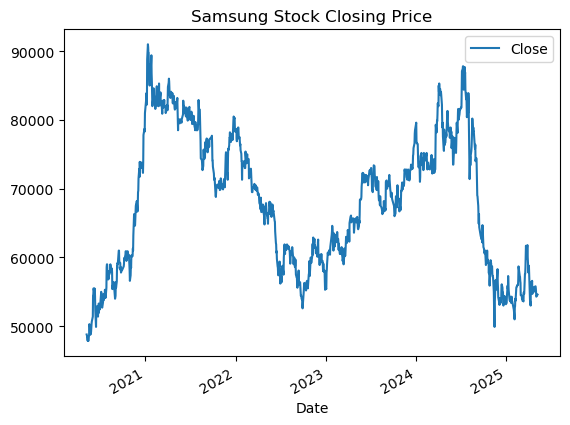

In [21]:
import matplotlib.pyplot as plt

df.plot(x='Date', y='Close', title='Samsung Stock Closing Price')
plt.show()


In [22]:
# Basic stock statistics
stats = {
    "Median Closing Price": df['Close'].median(),
    "Average Trading Volume": df['Volume'].mean(),
    "Max Price": df['High'].max(),
    "Min Price": df['Low'].min(),
    "Average Daily Range": (df['High'] - df['Low']).mean(),
    "Average Daily Return": ((df['Close'] - df['Open']) / df['Open'] * 100).mean(),
    "Volatility (Std Dev of Close)": df['Close'].std(),
    "Days with Positive Returns": (df['Close'] > df['Open']).sum(),
    "Days with Negative Returns": (df['Close'] < df['Open']).sum()
}

# Create a DataFrame for nicer display
stats_df = pd.DataFrame(list(stats.items()), columns=['Metric', 'Value'])

# Format values for better readability
stats_df['Value'] = stats_df['Value'].apply(lambda x: f"{x:.2f}" if isinstance(x, float) else x)

# Display statistics
print("Basic Stock Statistics:")
print(stats_df)

# Calculate monthly average closing prices if you have enough data
if len(df) > 30:
    print("\nMonthly Average Closing Prices:")
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_avg = df.groupby('Month')['Close'].mean()
    print(monthly_avg.tail(6))  # Show last 6 months

Basic Stock Statistics:
                          Metric        Value
0           Median Closing Price     68600.00
1         Average Trading Volume  17559020.93
2                      Max Price     96800.00
3                      Min Price     47200.00
4            Average Daily Range      1232.10
5           Average Daily Return        -0.07
6  Volatility (Std Dev of Close)      9872.42
7     Days with Positive Returns       519.00
8     Days with Negative Returns       636.00

Monthly Average Closing Prices:
Month
2024-12    54035.000000
2025-01    54361.111111
2025-02    55665.000000
2025-03    57260.000000
2025-04    55686.363636
2025-05    54450.000000
Freq: M, Name: Close, dtype: float64


In [23]:
import pandas as pd

# Assuming your cleaned data is in a DataFrame called 'df'

# Specify the file path where you want to save the CSV
file_path = r"C:\Users\andre\OneDrive\Documents\hochschule\1.1. 6. Semester\Business Analytics Schwerpunkt\Menden\VS_code_projekt\THWS_Reihenanalysen\StockData_Samsung_final.csv"

# Save the cleaned and modified data to the specified file path
df.to_csv(file_path, index=False)


ADF Statistik für Close-Preise: -2.192249099130497
p-value: 0.20907060443741493
Kritische Werte: {'1%': -3.4357081998138064, '5%': -2.863906139614306, '10%': -2.568029768447359}
Die Zeitreihe ist nicht stationär (kein konstanter Mittelwert).


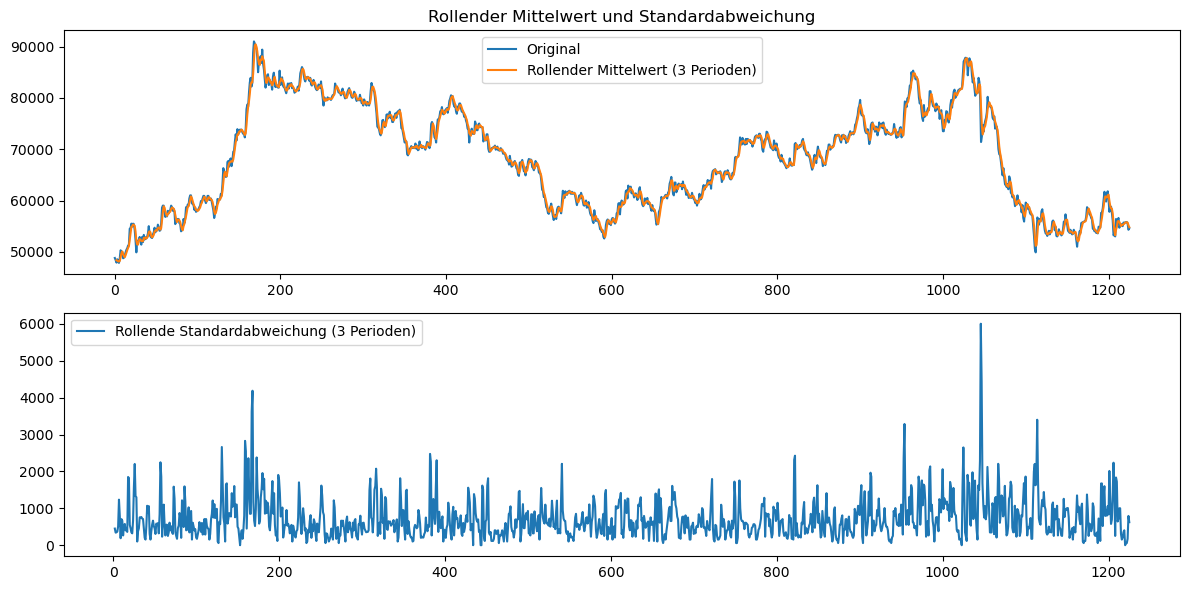


Breusch-Pagan Test für konstante Varianz:
LM-Statistik: 15.364189319485709
LM-Test p-value: 8.865263413351515e-05
F-Statistik: 15.533794359246311
F-Test p-value: 8.56294230516934e-05
Die Varianz ist nicht konstant (Heteroskedastizität).

Ljung-Box Test für konstante Kovarianz (Autokorrelation):
Statistiken: 1    1208.274878
2    2395.637979
3    3564.559543
4    4716.181983
5    5849.564323
Name: lb_stat, dtype: float64
p-values: 1    9.703813e-265
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     0.000000e+00
Name: lb_pvalue, dtype: float64
Es gibt signifikante Autokorrelation (keine konstante Kovarianz).

ADF Statistik für Renditen: -26.00277312261795
p-value: 0.0
Die Renditen sind stationär (konstanter Mittelwert für Renditen).


In [27]:
# Konstanten Mittelwert prüfen (Stationarität der Mittelwerte)
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test für "Close" Preise
adf_result = adfuller(df['Close'])
print("ADF Statistik für Close-Preise:", adf_result[0])
print("p-value:", adf_result[1])
print("Kritische Werte:", adf_result[4])
if adf_result[1] < 0.05:
    print("Die Zeitreihe ist stationär (konstanter Mittelwert).")
else:
    print("Die Zeitreihe ist nicht stationär (kein konstanter Mittelwert).")

# Berechnung der rollenden Statistiken für Mittelwert und Varianz
rolling_mean = df['Close'].rolling(window=3).mean()
rolling_std = df['Close'].rolling(window=3).std()

# Visualisierung zur Prüfung der konstanten Mittelwerte und Varianzen
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.title('Rollender Mittelwert und Standardabweichung')
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='Rollender Mittelwert (3 Perioden)')
plt.legend()

plt.subplot(212)
plt.plot(rolling_std, label='Rollende Standardabweichung (3 Perioden)')
plt.legend()
plt.tight_layout()
plt.show()

# Konstante Varianz prüfen (Homoskedastizität)
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Einfaches Modell für Breusch-Pagan Test
X = sm.add_constant(df.index)
bp_test = het_breuschpagan(df['Close'], X)
print("\nBreusch-Pagan Test für konstante Varianz:")
print(f"LM-Statistik: {bp_test[0]}")
print(f"LM-Test p-value: {bp_test[1]}")
print(f"F-Statistik: {bp_test[2]}")
print(f"F-Test p-value: {bp_test[3]}")
if bp_test[1] < 0.05:
    print("Die Varianz ist nicht konstant (Heteroskedastizität).")
else:
    print("Die Varianz ist konstant (Homoskedastizität).")

# Konstante Kovarianz prüfen (Autokorrelation)
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box Test für Autokorrelation
lb_test = acorr_ljungbox(df['Close'], lags=5)
print("\nLjung-Box Test für konstante Kovarianz (Autokorrelation):")
print("Statistiken:", lb_test.lb_stat)
print("p-values:", lb_test.lb_pvalue)
if any(p < 0.05 for p in lb_test.lb_pvalue):
    print("Es gibt signifikante Autokorrelation (keine konstante Kovarianz).")
else:
    print("Keine signifikante Autokorrelation (konstante Kovarianz).")

# Optional: Berechnung der Renditen, da diese oft eher stationär sind
df['Returns'] = df['Close'].pct_change().dropna()

# Stationaritätstest für Renditen
if len(df['Returns'].dropna()) > 0:
    adf_returns = adfuller(df['Returns'].dropna())
    print("\nADF Statistik für Renditen:", adf_returns[0])
    print("p-value:", adf_returns[1])
    if adf_returns[1] < 0.05:
        print("Die Renditen sind stationär (konstanter Mittelwert für Renditen).")
    else:
        print("Die Renditen sind nicht stationär.")

Interpretation Ihrer Testergebnisse
Basierend auf den Ergebnissen Ihrer statistischen Tests kann ich Ihnen folgende Interpretation anbieten:
1. Konstante Varianz (Breusch-Pagan Test)

LM-Statistik: 15.36
p-value: 8.87e-05 (sehr klein, deutlich unter 0.05)
Ergebnis: Die Varianz ist nicht konstant (Heteroskedastizität ist vorhanden)

Interpretation: Die niedrige p-value (weit unter 0.05) zeigt, dass die Nullhypothese einer konstanten Varianz verworfen werden muss. Ihre Finanzdaten weisen eine signifikante Heteroskedastizität auf, was bedeutet, dass die Volatilität der Kurse sich im Zeitverlauf ändert. Dies ist typisch für Finanzdaten, da Marktphasen mit höherer und niedrigerer Volatilität einander abwechseln.
2. Konstante Kovarianz (Ljung-Box Test)

p-values für alle Lags: praktisch 0 (extrem kleine Werte)
Ergebnis: Signifikante Autokorrelation vorhanden

Interpretation: Die extrem niedrigen p-Werte (nahe 0) bedeuten, dass eine starke Autokorrelation in Ihren Daten existiert. Die Kurswerte hängen also von ihren eigenen vergangenen Werten ab. Dies widerspricht der Annahme einer konstanten Kovarianz und bedeutet, dass vergangene Preisbewegungen einen Einfluss auf zukünftige Preisbewegungen haben - was auf Ineffizienzen im Markt hindeuten könnte oder auf andere strukturelle Eigenschaften der Zeitreihe.
3. Stationarität der Renditen (ADF Test)

ADF-Statistik: -26.00
p-value: 0.0 (extrem klein)
Ergebnis: Die Renditen sind stationär

Interpretation: Während die ursprünglichen Preisdaten wahrscheinlich nicht stationär sind (dies war im Output nicht enthalten), sind die Renditen stationär. Dies ist ein typisches Phänomen bei Finanzdaten: Während die Preise selbst einem nicht-stationären Prozess folgen, neigen die prozentualen Veränderungen (Renditen) dazu, stationär zu sein. Das bedeutet, dass die Renditen um einen konstanten Mittelwert schwanken.
Gesamtinterpretation
Ihre Finanzdaten zeigen die klassischen Merkmale von Zeitreihen im Finanzbereich:

Nicht-konstante Varianz: Die Volatilität ändert sich im Zeitverlauf - es gibt Perioden höherer und niedrigerer Schwankungen.
Vorhandene Autokorrelation: Preisbewegungen sind nicht unabhängig von vergangenen Perioden, was die Annahme der Markteffizienzhypothese in ihrer striktesten Form in Frage stellt.
Stationäre Renditen: Während die absoluten Preise einem Trend folgen können, schwanken die relativen Änderungen (Renditen) um einen konstanten Mittelwert.

Praktische Konsequenzen

Für eine korrekte Modellierung dieser Daten sollten Sie Verfahren verwenden, die Heteroskedastizität berücksichtigen können (z.B. GARCH-Modelle für die Volatilitätsmodellierung)
Die vorhandene Autokorrelation könnte auf Vorhersagbarkeit hindeuten, die möglicherweise für Trading-Strategien genutzt werden könnte
Da die Renditen stationär sind, könnten Sie für die Zeitreihenanalyse mit den Renditen anstatt mit den absoluten Preisen arbeiten

Diese Eigenschaften sind typisch für Finanzmarktdaten und keine Überraschung für jemanden, der mit Finanzmarktanalysen vertraut ist.

In [29]:
# Erweiterte Stationaritätstests
from statsmodels.tsa.stattools import kpss

# KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)
# Nullhypothese: Zeitreihe ist stationär (Gegenteil vom ADF-Test)
def run_kpss(series, series_name="Zeitreihe"):
    kpss_result = kpss(series, regression='c')
    print(f"KPSS Test für {series_name}:")
    print(f"KPSS Statistik: {kpss_result[0]}")
    print(f"p-value: {kpss_result[1]}")
    print(f"Kritische Werte: {kpss_result[3]}")
    if kpss_result[1] < 0.05:
        print(f"{series_name} ist nicht stationär gemäß KPSS Test.")
    else:
        print(f"{series_name} ist stationär gemäß KPSS Test.")
    print()

# Originaldaten und Renditen testen
run_kpss(df['Close'], "Close-Preise")
if 'Returns' in df.columns:
    run_kpss(df['Returns'].dropna(), "Renditen")

KPSS Test für Close-Preise:
KPSS Statistik: 0.38765616121412116
p-value: 0.0824757925801202
Kritische Werte: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Close-Preise ist stationär gemäß KPSS Test.

KPSS Test für Renditen:
KPSS Statistik: 0.2950770506941867
p-value: 0.1
Kritische Werte: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Renditen ist stationär gemäß KPSS Test.



c:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [37]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install arch

     -------------------------------------- 928.2/928.2 kB 7.3 MB/s eta 0:00:00
     --------------------------------------- 15.9/15.9 MB 10.6 MB/s eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [41]:
pip install numpy==1.24.4


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numba

     --------------------------------------- 14.0/14.0 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\andre\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from arch.unitroot import PhillipsPerron, KPSS, ADF

def phillips_perron_test(time_series):
    """
    Führt den Phillips-Perron (PP) Test für Stationarität durch mit arch_unit_root.
    
    Args:
        time_series: Pandas Series oder eindimensionales Array mit den Zeitreihendaten
        
    Returns:
        dict: Ein Dictionary mit den Testergebnissen
    """
    # Phillips-Perron Test mit arch_unit_root
    pp_test = PhillipsPerron(time_series.dropna())
    pp_result = pp_test.stat
    pp_result_pval = pp_test.pvalue
    pp_critical_values = pp_test.critical_values
    
    is_stationary = pp_result_pval <= 0.05
    
    # Ergebnisse als Dictionary
    results = {
        'test_statistic': pp_result,
        'p_value': pp_result_pval,
        'critical_values': pp_critical_values,
        'is_stationary': is_stationary
    }
    
    # Ausgabe der Ergebnisse
    print("Phillips-Perron (PP) Test für Stationarität")
    print("===========================================")
    print(f"PP Test-Statistik: {pp_result:.4f}")
    print(f"p-Wert: {pp_result_pval:.4f}")
    print("Kritische Werte:")
    for key, value in pp_critical_values.items():
        print(f"   {key}: {value:.4f}")
    
    if is_stationary:
        print("\nErgebnis: Die Zeitreihe ist STATIONÄR (p-Wert <= 0.05)")
        print("Interpretation: Die Nullhypothese einer Einheitswurzel wird abgelehnt.")
    else:
        print("\nErgebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)")
        print("Interpretation: Die Nullhypothese einer Einheitswurzel wird nicht abgelehnt.")
    
    return results

def compare_stationarity_tests(time_series):
    """
    Vergleicht verschiedene Stationaritätstests (ADF, PP, KPSS) mit arch_unit_root.
    
    Args:
        time_series: Pandas Series oder eindimensionales Array mit den Zeitreihendaten
    """
    print("\n=== Vergleich verschiedener Stationaritätstests ===\n")
    
    # Daten vorbereiten - NaN-Werte entfernen
    clean_series = time_series.dropna()
    
    # ADF Test mit arch
    adf_test = ADF(clean_series)
    adf_pval = adf_test.pvalue
    adf_is_stationary = adf_pval <= 0.05
    
    # PP Test mit arch
    pp_test = PhillipsPerron(clean_series)
    pp_pval = pp_test.pvalue
    pp_is_stationary = pp_pval <= 0.05
    
    # KPSS Test mit arch (Nullhypothese umgekehrt: Stationarität vs. Unit Root)
    kpss_test = KPSS(clean_series)
    kpss_pval = kpss_test.pvalue
    kpss_is_stationary = kpss_pval > 0.05  # KPSS: p > 0.05 bedeutet Stationarität
    
    # Ergebnisse zusammenfassen
    print(f"ADF Test:  p-Wert = {adf_pval:.6f}, Stationär: {adf_is_stationary}")
    print(f"PP Test:   p-Wert = {pp_pval:.6f}, Stationär: {pp_is_stationary}")
    print(f"KPSS Test: p-Wert = {kpss_pval:.6f}, Stationär: {kpss_is_stationary}")
    
    # Gesamtbeurteilung
    print("\nGesamtbeurteilung:")
    if adf_is_stationary and pp_is_stationary and kpss_is_stationary:
        print("STARK STATIONÄR: Alle Tests deuten auf Stationarität hin.")
    elif (adf_is_stationary and pp_is_stationary) or (adf_is_stationary and kpss_is_stationary) or (pp_is_stationary and kpss_is_stationary):
        print("WAHRSCHEINLICH STATIONÄR: Die Mehrheit der Tests deutet auf Stationarität hin.")
    elif not adf_is_stationary and not pp_is_stationary and not kpss_is_stationary:
        print("STARK NICHT-STATIONÄR: Alle Tests deuten auf Nicht-Stationarität hin.")
    else:
        print("UNKLARE STATIONARITÄT: Die Tests liefern widersprüchliche Ergebnisse.")
        print("Empfehlung: Transformationen wie Differenzierung oder Log-Transformation in Betracht ziehen.")

# Beispiel für die Verwendung mit deinen bereits geladenen Daten
def test_stationarity_with_pp(df, column='Close', transformations=True):
    """
    Führt PP-Test für Stationarität auf einem DataFrame durch.
    
    Args:
        df: Pandas DataFrame mit den Zeitreihendaten
        column: Name der zu analysierenden Spalte
        transformations: Wenn True, werden auch Transformationen (Log, Diff) getestet
    """
    try:
        # Sicherstellen, dass die angegebene Spalte existiert
        if column not in df.columns:
            available_columns = ", ".join(df.columns)
            print(f"Spalte '{column}' nicht gefunden. Verfügbare Spalten: {available_columns}")
            if len(df.columns) > 0:
                column = df.columns[0]
                print(f"Verwende stattdessen '{column}'.")
        
        # Originale Zeitreihe extrahieren
        original_series = df[column].copy()
        
        # PP-Test für originale Daten durchführen
        print("\n--- Phillips-Perron Test für originale Daten ---")
        pp_original = phillips_perron_test(original_series)
        
        if transformations:
            try:
                # Log-Transformation (nur für positive Werte)
                if (original_series <= 0).any():
                    print("Warnung: Zeitreihe enthält Nullen oder negative Werte. Log-Transformation nicht möglich.")
                    log_series = None
                    pp_log = None
                else:
                    log_series = np.log(original_series)
                    print("\n--- Phillips-Perron Test für log-transformierte Daten ---")
                    pp_log = phillips_perron_test(log_series)
                
                # Differenzierte originale Daten
                diff_series = original_series.diff().dropna()
                print("\n--- Phillips-Perron Test für differenzierte Daten ---")
                pp_diff = phillips_perron_test(diff_series)
                
                # Differenzierte log-transformierte Daten (falls log möglich)
                if log_series is not None:
                    log_diff_series = log_series.diff().dropna()
                    print("\n--- Phillips-Perron Test für differenzierte log-transformierte Daten ---")
                    pp_log_diff = phillips_perron_test(log_diff_series)
                else:
                    log_diff_series = None
                    pp_log_diff = None
                
                # Vergleich der verschiedenen Tests für alle Transformationen
                print("\n=== Vergleich aller Stationaritätstests für verschiedene Transformationen ===")
                print("\nOriginal:")
                compare_stationarity_tests(original_series)
                
                if log_series is not None:
                    print("\nLog-transformiert:")
                    compare_stationarity_tests(log_series)
                
                print("\nDifferenziert:")
                compare_stationarity_tests(diff_series)
                
                if log_diff_series is not None:
                    print("\nDifferenziert log-transformiert:")
                    compare_stationarity_tests(log_diff_series)
                
                # Visualisierung
                if log_series is not None and log_diff_series is not None:
                    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
                    
                    # Original
                    axes[0, 0].plot(original_series)
                    axes[0, 0].set_title(f'Original: PP p-Wert={pp_original["p_value"]:.6f}')
                    axes[0, 0].grid(True)
                    
                    # Log-transformiert
                    axes[0, 1].plot(log_series)
                    axes[0, 1].set_title(f'Log: PP p-Wert={pp_log["p_value"]:.6f}')
                    axes[0, 1].grid(True)
                    
                    # Differenziert
                    axes[1, 0].plot(diff_series)
                    axes[1, 0].set_title(f'Differenziert: PP p-Wert={pp_diff["p_value"]:.6f}')
                    axes[1, 0].grid(True)
                    
                    # Differenziert log-transformiert
                    axes[1, 1].plot(log_diff_series)
                    axes[1, 1].set_title(f'Log+Diff: PP p-Wert={pp_log_diff["p_value"]:.6f}')
                    axes[1, 1].grid(True)
                else:
                    # Weniger Plots, wenn Log-Transformation nicht möglich
                    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
                    
                    # Original
                    axes[0].plot(original_series)
                    axes[0].set_title(f'Original: PP p-Wert={pp_original["p_value"]:.6f}')
                    axes[0].grid(True)
                    
                    # Differenziert
                    axes[1].plot(diff_series)
                    axes[1].set_title(f'Differenziert: PP p-Wert={pp_diff["p_value"]:.6f}')
                    axes[1].grid(True)
                
                plt.tight_layout()
                plt.show()
                
            except Exception as e:
                print(f"Fehler bei der Analyse der transformierten Daten: {str(e)}")
    
    except Exception as e:
        print(f"Fehler bei der Analyse der Daten: {str(e)}")

# Beispielaufruf
# test_stationarity_with_pp(df, column='Close', transformations=True)


SystemError: initialization of _internal failed without raising an exception